# Understanding Regression with Python

## Introduction

This notebook uses a simple Python simulation to illustrate some basic principles of regression models. Specifically, this notebook proceeds through the following steps. 

- Create a test data set.
- Plot the data set.
- Compute and plot the results of a linear regression model on these data.
- Compute and plot the results of linear regression models for data sets with increassing dispursion of theh data.
- Compute and plot the results of linear regression models for data sets with outliers.

## Create the data set

The code in the cell below computes the data set. The data are along a straight line with intercept of 0 and a slope of 1, with Normally distributed noise added. Run this code and examine the first few lines of the data frame.

In [2]:
def sim_reg_data(xmin, xmax, ymin, ymax, n, sd):
    import pandas as pd
    import numpy.random as nr
    
    w = nr.normal(loc = 0, scale = sd, size = n)

    xstep = float(xmax - xmin)/float(n - 1)
    ystep = float(ymax - ymin)/float(n - 1)
    
    x = []
    xcur = xmin
    y = []
    ycur = ymin 
    for i in range(n):
        x.append(xcur)
        xcur += xstep
        y.append(ycur + w[i])
        ycur += ystep
    
    out = pd.DataFrame([x, y]).transpose()
    out.columns = ['x', 'y']    
    return out      
sim_data = sim_reg_data(0, 10, 0, 10, 50, 1)
sim_data.head()

,x,y
0,0.000000,-1.361740
1,0.204082,-0.928085
2,0.408163,-1.922669
3,0.612245,-0.754523
4,0.816327,1.344264


## Plot the data set

Run the code in the cell below to plot the data set. Notice that the data falls close to a stright line.

'Done'

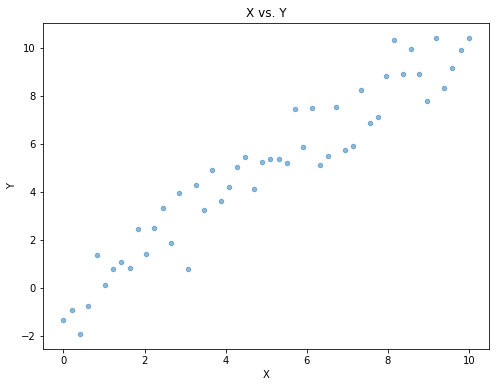

In [3]:
%matplotlib inline
def plot_2D(df):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(8, 6))
    fig.clf()
    ax = fig.gca()
    df.plot(kind = 'scatter', x = 'x', y = 'y', ax = ax, alpha = 0.5)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('X vs. Y')
    return 'Done'
plot_2D(sim_data)

## Compute and evaluate the regression model

The code in the cell below does the following:

- The linear regression model is computed and scored using scikit-learn.
- The regression line is ploted along with a histogram of the residuals.
- Some model performance statistics are computed.

One of the performance statistics used in adjusted $R^2_{adj}$:

$$R^2_{adj} = 1 - \frac{n-1}{n-p-1} \frac{Sum\ square\ residual}{Sum\ square\ total}\\
where,\ p = number\ of\ model\ parameters$$

Run this code and examine the results. Notice that the intercept and slope are close the exact values. The regression line is shown on the left plot. The histogram of the residuals is shown on the right. The residuals are approximately Normally distributed.

4.93724085642
46.654317362
564.081252094
Intercept = -0.524273671935
Slope = 1.09230290567
('Adjusted R^2 = ', '0.917291494463')


'  '

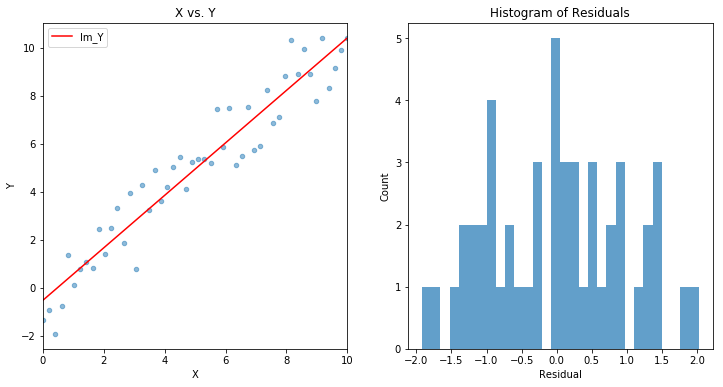

In [5]:
def plot_reg(df):
    import matplotlib.pyplot as plt
    from sklearn import linear_model
    import math

    ## Prepare data for model
    nrow = df.shape[0]
    X = df.x.as_matrix().reshape((nrow,1))
    Y = df.y.as_matrix()
    ## Compute the linear model
    clf = linear_model.LinearRegression()
    lm = clf.fit(X, Y)
    ## Compute the y values
    df['lm_Y'] = lm.predict(X)   
    df.sort_values(by='x', ascending=True, inplace = True)

    fig, ax = plt.subplots(1, 2, figsize = (12,6))
    df.plot(kind = 'scatter', x = 'x', y = 'y', ax = ax[0], alpha = 0.5)
    df.plot(kind = 'line', x = 'x', y = 'lm_Y', style = ['r'], ax = ax[0])  
    ax[0].set_xlabel('X')
    ax[0].set_ylabel('Y')
    ax[0].set_title('X vs. Y')
    
    
    df['resids'] = (df.lm_Y - df.y)    
    ax[1].hist(df['resids'], bins = 30, alpha = 0.7) 
    ax[1].set_xlabel('Residual')
    ax[1].set_ylabel('Count')
    ax[1].set_title('Histogram of Residuals')  
    
    SSR = sum([x*x for x in df.resids])
    Ybar = df.y.mean()
    SST = sum([(x - Ybar)**2 for x in df.y])
    R2_adj = 1.0 - (SSR/SST) * ((nrow - 1)/(nrow - 3))
    print(str(Ybar))
    print(str(SSR))
    print(str(SST))
    print('Intercept = ' + str(lm.intercept_))
    print('Slope = ' + str(lm.coef_[0]))
    print('Adjusted R^2 = ', str(R2_adj))
    return '  '
plot_reg(sim_data)

## Regression with increasing data dispursion

The code in the cell below computes data sets with inceasing dispursion (standard deviation); 1, 5 and 10. The regression model is plotted and evaluated for each data set.

Run this code and examine the results. Notice that the accuracy of the model and dispursion of the residuals of the models increses with increasing dispursion of the data.

5.62229169838
46.5166655741
384.093558736
Intercept = 0.230599280869
Slope = 0.980307712274
('Adjusted R^2 = ', '0.878892357041')
4.05769532196
1082.42382523
1419.53923188
Intercept = -1.33031046252
Slope = 0.97963741536
('Adjusted R^2 = ', '0.237482275294')
4.97386617868
5332.75676266
5333.48878565
Intercept = 4.72279254216
Slope = 0.0456497520943
('Adjusted R^2 = ', '0.000137250309911')


'Done'

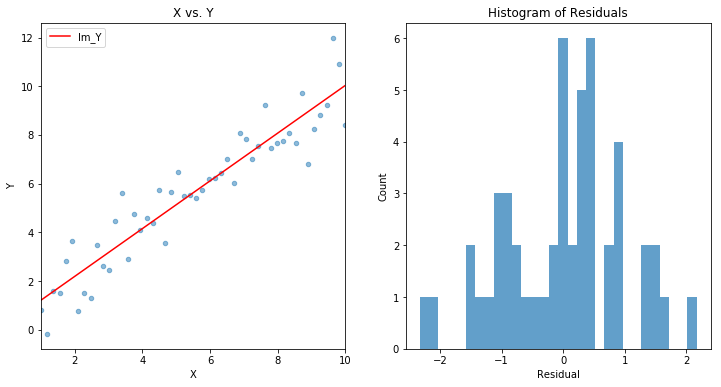

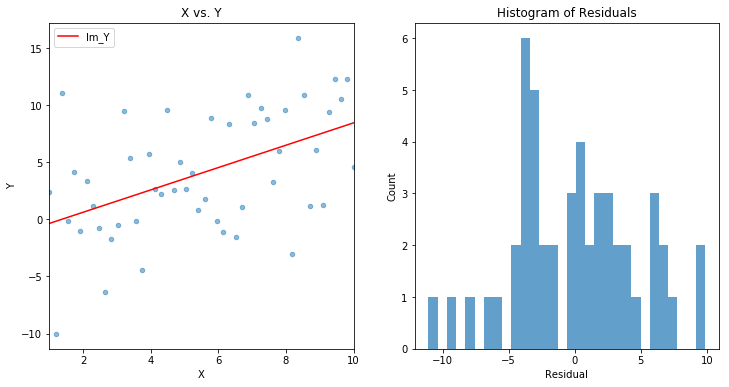

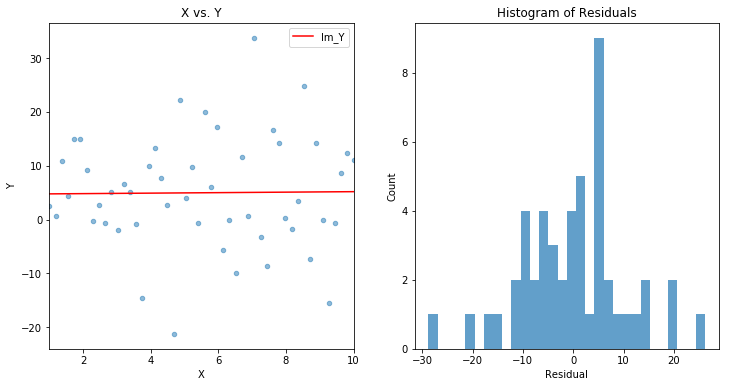

In [8]:
def sim_reg():
    sds = [1, 5, 10]
    for sd in sds:
      reg_data = sim_reg_data(1, 10, 1, 10, 50, sd)
      plot_reg(reg_data)
    return 'Done'    
sim_reg()

## Regression with outlier

The code cell below does the following:

- First the data set, including  single outlier, is included. the outliner is placed in three different locations.
- The function then calls the functions to compute the model and evaluate the results.

Run the code and examine the effects of the single outlier on the regression results. Noice how each position of the outlier has a distict effect on the result.

5.66065773081
116.096493269
351.021855743
Intercept = 1.42614415545
Slope = 0.78530979034
('Adjusted R^2 = ', '0.669261354046')
5.12562466236
127.483628952
637.912807959
Intercept = -1.11612466687
Slope = 1.15756078469
('Adjusted R^2 = ', '0.800155088029')
5.34304276386
91.4909171168
505.463156608
Intercept = -0.614923902879
Slope = 1.08520107144
('Adjusted R^2 = ', '0.818995873545')


'Done'

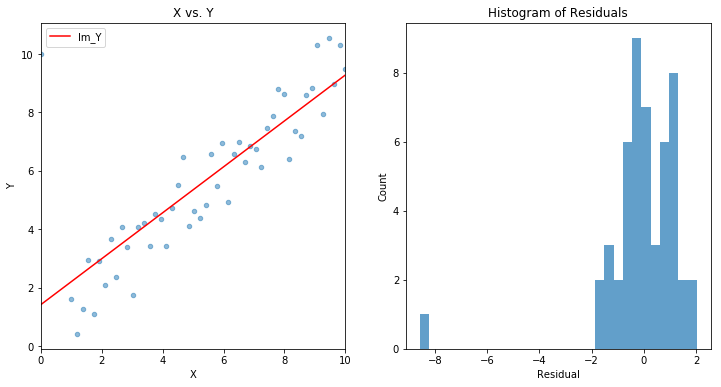

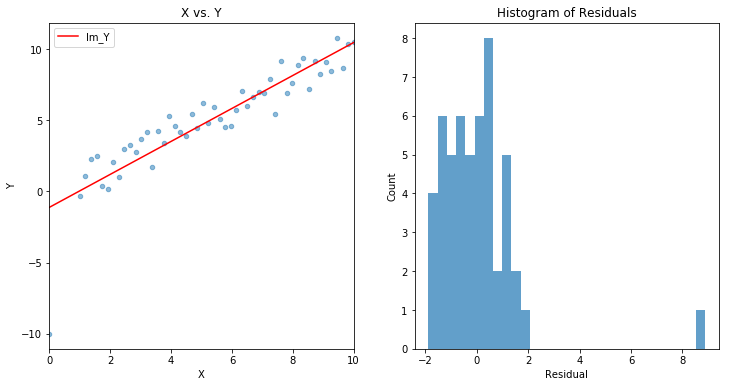

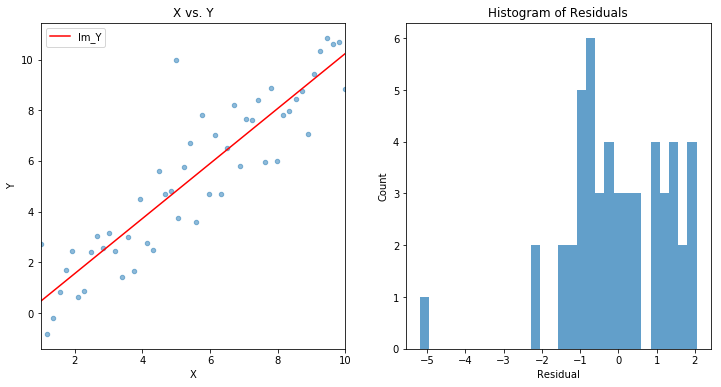

In [9]:
def sim_reg_outlier(xmin, xmax, ymin, ymax, n, sd, olX, olY):
    import pandas as pd
    import numpy.random as nr
    
    w = nr.normal(loc = 0, scale = sd, size = n)

    xstep = float(xmax - xmin)/float(n - 1)
    ystep = float(ymax - ymin)/float(n - 1)
    
    x = []
    xcur = xmin
    y = []
    ycur = ymin 
    for i in range(n):
        x.append(xcur)
        xcur += xstep
        y.append(ycur + w[i])
        ycur += ystep
    
    x.append(olX)
    y.append(olY)
    
    out = pd.DataFrame([x, y]).transpose()
    out.columns = ['x', 'y']    
    return out 

def sim_outlier():
    ox = [0, 0, 5]
    oy = [10, -10, 10]
    for x, y in zip(ox, oy):
        reg_data = sim_reg_outlier(1, 10, 1, 10, 50, 1, x, y)
        plot_reg(reg_data)
    return 'Done' 
sim_outlier()